# Lung Cancer Risk Prediction Using Machine Learning

# Introduction

This project aims to create a **Machine Learning Model** using **KNN** to predict **Lung Cancer Risk Levels** (Low, Medium, High) using various patient attributes.

# Data Description

**About this dataset:**

This dataset contains information on patients with lung cancer, including their age, gender, air pollution exposure, alcohol use, dust allergy, occupational hazards, genetic risk, chronic lung disease, balanced diet, obesity, smoking, passive smoker, chest pain, coughing of blood, fatigue, weight loss, shortness of breath, wheezing, swallowing difficulty, clubbing of finger nails and snoring.

**All the features in the data set are defined as follows:**

***File: cancer patient data sets.csv***

* `Age:` The age of the patient. (Numeric)
* `Gender:` The gender of the patient. (Categorical)
* `Air Pollution:` The level of air pollution exposure of the patient. (Categorical)
* `Alcohol use:` The level of alcohol use of the patient. (Categorical)
* `Dust Allergy:` The level of dust allergy of the patient. (Categorical)
* `OccuPational Hazards:` The level of occupational hazards of the patient. (Categorical)
* `Genetic Risk:` The level of genetic risk of the patient. (Categorical)
* `chronic Lung Disease:` The level of chronic lung disease of the patient. (Categorical)
* `Balanced Diet:` The level of balanced diet of the patient. (Categorical)
* `Obesity:` The level of obesity of the patient. (Categorical)
* `Smoking:` The level of smoking of the patient. (Categorical)
* `Passive Smoker:` The level of passive smoker of the patient. (Categorical)
* `Chest Pain:` The level of chest pain of the patient. (Categorical)
* `Coughing of Blood:` The level of coughing of blood of the patient. (Categorical)
* `Fatigue:` The level of fatigue of the patient. (Categorical)
* `Weight Loss:` The level of weight loss of the patient. (Categorical)
* `Shortness of Breath:` The level of shortness of breath of the patient. (Categorical)
* `Wheezing:` The level of wheezing of the patient. (Categorical)
* `Swallowing Difficulty:` The level of swallowing difficulty of the patient. (Categorical)
* `Clubbing of Finger Nails:` The level of clubbing of finger nails of the patient. (Categorical)

# Project Outline

- Data Loading and Initial Exploration
- Data Preprocessing
- Exploratory Data Analysis (EDA) and Visualization
- Preparing Training And Test Data
- Training The Model
- Predicting Cancer Risk Level
- Conclusion
- Future Work

# 1. Data Loading and Initial Exploration

**1.1 Importing Libraries**

We begin by importing the necessary Python libraries for data manipulation and numerical operations.

In [ ]:
import pandas as pd
import numpy as np

**1.2 Loading Dataset**

The patient data is loaded from the CSV file into a Pandas DataFrame.

In [ ]:
Patient_df= pd.read_csv('/content/cancer patient data sets.csv')

**1.3 Glimpse of the Data**

Displaying the DataFrame to get a quick overview of the dataset's structure and content.

In [ ]:
Patient_df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


**1.4 Dataset Information**

Checking the data types and non-null counts for each column to identify potential issues like missing values or incorrect data types.

In [ ]:
Patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

We can see that there are 26 features in the data set and there is no null feature. Each column contains 1000 values, with integer and object data types.

**1.5 Descriptive Statistics**

Viewing the descriptive statistics for the `Patient_df` DataFrame.

In [ ]:
Patient_df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


**1.6 Feature Value Ranges**

Viewing the range for numerical columns and unique values for categorical/object columns, exclude identifier columns i.e. `Patient Id`, `index`. This helps in understanding the scale and variety of data within each feature.

In [ ]:
# --- Code to view Feature Value Ranges ---
print("--- Feature Value Ranges in Original DataFrame ---")

# Iterate through each column to display its range or unique values
for column in Patient_df.columns:
    if column not in ['Patient Id', 'index']: # Exclude identifier columns
        if Patient_df[column].dtype in ['int64', 'float64']:
            # For numerical columns, print min and max
            min_val = Patient_df[column].min()
            max_val = Patient_df[column].max()
            print(f"{column}: Range = ({min_val}, {max_val})")
        else:
            # For categorical or object columns, print unique values
            unique_vals = Patient_df[column].unique()
            print(f"{column}: Unique Values = {unique_vals}")

--- Feature Value Ranges in Original DataFrame ---
Age: Range = (14, 73)
Gender: Range = (1, 2)
Air Pollution: Range = (1, 8)
Alcohol use: Range = (1, 8)
Dust Allergy: Range = (1, 8)
OccuPational Hazards: Range = (1, 8)
Genetic Risk: Range = (1, 7)
chronic Lung Disease: Range = (1, 7)
Balanced Diet: Range = (1, 7)
Obesity: Range = (1, 7)
Smoking: Range = (1, 8)
Passive Smoker: Range = (1, 8)
Chest Pain: Range = (1, 9)
Coughing of Blood: Range = (1, 9)
Fatigue: Range = (1, 9)
Weight Loss: Range = (1, 8)
Shortness of Breath: Range = (1, 9)
Wheezing: Range = (1, 8)
Swallowing Difficulty: Range = (1, 8)
Clubbing of Finger Nails: Range = (1, 9)
Frequent Cold: Range = (1, 7)
Dry Cough: Range = (1, 7)
Snoring: Range = (1, 7)
Level: Unique Values = ['Low' 'Medium' 'High']


# 2. Data Preprocessing

Preparing the data for machine learning by cleaning, transforming, and structuring it appropriately. This includes renaming columns and removing irrelevant identifiers.

**2.1 Column Renaming**

Replacing the space with underscore in column names to avoid any error.

In [ ]:
# Replacing the space with underscore in column names to avoid any error.

Patient_df = Patient_df.rename(columns=lambda x: x.replace(' ', '_'))

Displaying the DataFrame after renaming columns to confirm the changes.

In [ ]:
Patient_df

,index,Patient_Id,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


**2.2 Dropping Irrelevant Columns**

The `Patient_Id` and `index` columns are identifiers that do not contribute to the prediction model and are therefore dropped from the DataFrame.

In [ ]:
# Dropping irrelevant columns from the original dataframe
Patient_df = Patient_df.drop(['Patient_Id', 'index'], axis=1)

Displaying the DataFrame after dropping the specified columns to confirm the changes.

In [ ]:
Patient_df

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


# 3. Exploratory Data Analysis (EDA) and Visualization

Analysing and visualize the data to uncover patterns, relationships, and insights.

Importing required libraries. We are using libraries Matplotlib, Seaborn and Plotly for visualization.

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

**3.1 Age Distribution**

In [ ]:
fig = px.histogram(Patient_df,
                   x = 'Age',
                   marginal='box',
                   nbins=47,
                   title='Age Distribution')
fig.update_layout(bargap=0.05)
fig.show()

<Axes: xlabel='Age', ylabel='Count'>

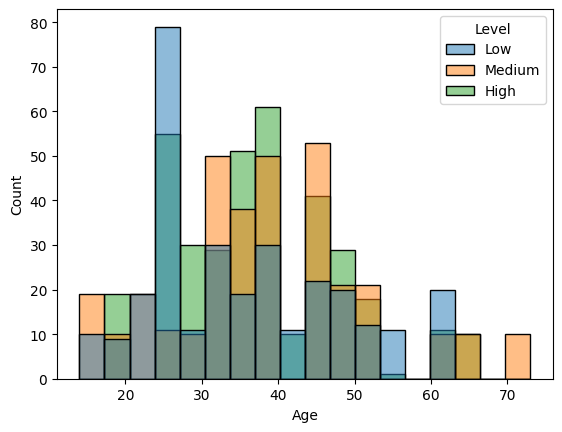

In [ ]:
sns.histplot(Patient_df, x='Age',hue='Level')

Buy analysing this visualisation we can see the distribution of cancer levels in different ages.

In [ ]:
px.scatter(Patient_df,
           x ='Age',
           y = 'Smoking',
           color='Level',
           title = 'Age VS Smoking')

<Axes: xlabel='Age', ylabel='Alcohol_use'>

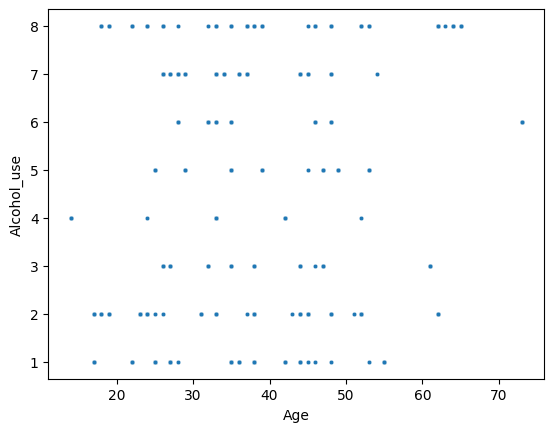

In [ ]:
sns.scatterplot(data=Patient_df, x='Age',y='Alcohol_use',s=10)

**3.2 Gender Distribution**

Here,

**Gender 1** = **Male**, and

**Gender 2** = **Female**.

In [ ]:
px.histogram(Patient_df, x='Level',color='Gender')

**3.3 Level of Cancer**

In [ ]:
fig = px.histogram(Patient_df,
                   x = 'Level',
                   marginal='box',
                   title='Cancer Level')
fig.update_layout(bargap=0.05)
fig.show()

Text(0.5, 1.0, 'Level Of Cancer')

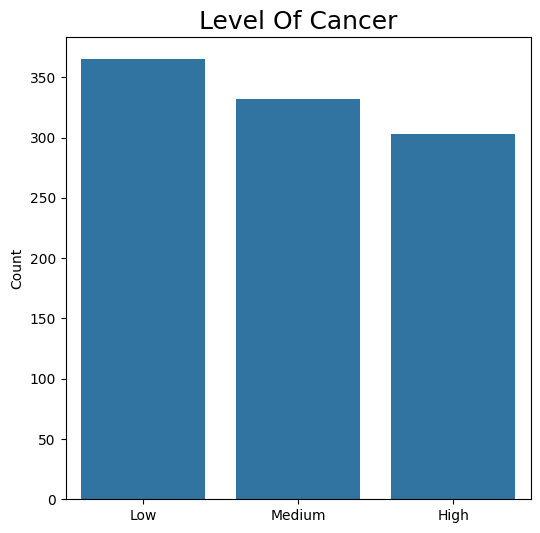

In [ ]:
a = Patient_df.Level.value_counts()
plt.figure(figsize=(6,6))
sns.barplot(x=['Low','Medium','High'],y=a)
plt.ylabel('Count')
plt.title("Level Of Cancer", fontsize = 18)

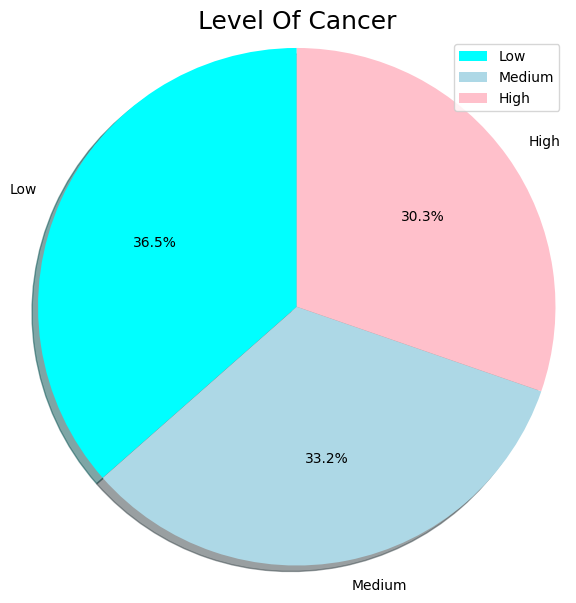

In [ ]:
b = Patient_df.Level.value_counts()
colors = ['cyan', 'lightblue','pink']
plt.figure(figsize=(7,7))
plt.title('Level Of Cancer',fontsize=18)
plt.pie(b,colors=colors,
        labels =['Low','Medium','High'],
        autopct = '%1.1f%%',startangle=90,shadow=True,
       radius = 1.2,explode = (0, 0.0005,0))
plt.legend();

Buy analysing this visualisation we can clearly see that the cancer levels are almost equally distributed in the data set.

The data set contains highest number of low risk patients (36.5%) and lowest number of high risk patients (30.3%).

# 4. Preparing Training And Test Data

**4.1 Separating Features and Target**

The `Patient_df` is separated into features and target.

Features contains all the columns except the **Level** column, which is used for target.

In [ ]:
# Separate Features (X) and Target (y)
X = Patient_df.drop('Level', axis=1)
y = Patient_df['Level']

**4.2 Using level encoder To Transform y**

The `Level` column contains three distinct categorical values:

1. Low
2. Medium
3. High

Using a Label Encoder, these categories can be mapped to numerical labels, such as:

- Low: 0
- Medium: 1
- High: 2

This transformation enables machine learning algorithms to work with the categorical target variable.

In [ ]:

# Using level encoder transforming y
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)


**4.3 Splitting data into training and test set**

The data is splitted into training and testing sets. Here, 80% of the data is used for training and 20% of data is used for testing.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 23)
X_test shape: (200, 23)
y_train shape: (800,)
y_test shape: (200,)


**4.4 Applying one-hot encoding to the 'Gender' column**

In [ ]:
# --- APPLY ONE-HOT ENCODING TO THE 'Gender' COLUMN ---
# This modifies X_train and X_test in place, adding new columns for Gender.
print("\n--- Applying One-Hot Encoding for 'Gender' ---")
X_train = pd.get_dummies(X_train, columns=['Gender'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Gender'], drop_first=True)

# Important: Ensure columns are aligned between train and test after get_dummies.
# This handles cases where a category might exist in one split but not the other.
train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

# Ensure the order of columns is identical for both train and test sets
X_test = X_test[train_cols]

print("Shape of X_train after Gender One-Hot Encoding:", X_train.shape)
print("Shape of X_test after Gender One-Hot Encoding:", X_test.shape)
print("X_train head (Gender_2 column):\n", X_train[['Gender_2']].head().to_markdown(index=False, numalign="left", stralign="left"))


--- Applying One-Hot Encoding for 'Gender' ---
Shape of X_train after Gender One-Hot Encoding: (800, 23)
Shape of X_test after Gender One-Hot Encoding: (200, 23)
X_train head (Gender_2 column):
 | Gender_2   |
|:-----------|
| 1          |
| 0          |
| 1          |
| 0          |
| 0          |


Viewing `X_train` and `X_test`

In [ ]:
X_train

,Age,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,Smoking,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Gender_2
29,28,1,6,7,5,3,2,6,2,3,...,3,3,7,7,4,8,7,7,5,True
535,53,6,8,7,7,6,7,7,3,8,...,5,2,5,2,3,2,1,7,6,False
695,28,1,6,7,5,3,2,6,2,3,...,3,3,7,7,4,8,7,7,5,True
557,62,6,8,7,7,7,6,2,4,1,...,2,7,6,5,1,9,3,4,2,False
836,38,2,3,5,2,1,1,1,1,4,...,2,1,3,4,6,1,3,2,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,33,6,7,7,7,7,7,6,7,7,...,8,5,7,6,7,8,7,6,2,False
270,24,1,2,2,3,2,4,2,3,2,...,1,1,1,2,3,4,5,2,1,True
860,36,2,1,5,3,2,3,2,4,1,...,6,7,2,5,8,1,3,2,3,True
435,49,6,5,6,5,5,4,6,7,2,...,8,7,9,2,1,4,6,7,2,False


In [ ]:
X_test

,Age,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,Smoking,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Gender_2
521,48,1,6,7,8,7,6,7,7,3,...,3,2,6,4,2,3,1,2,1,True
737,62,6,8,7,7,7,6,2,4,1,...,2,7,6,5,1,9,3,4,2,False
740,22,6,8,7,7,7,6,2,4,1,...,2,7,6,5,1,9,3,4,2,False
660,37,7,7,7,7,6,7,7,7,7,...,4,2,3,1,4,5,6,7,5,True
411,46,1,6,7,5,3,2,6,2,3,...,3,3,7,7,4,8,7,7,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,35,2,1,5,3,2,3,2,4,1,...,6,7,2,5,8,1,3,2,3,False
332,18,6,8,7,7,7,6,7,7,8,...,3,2,4,1,4,2,4,2,3,True
208,28,6,7,7,7,7,6,7,7,7,...,5,3,2,7,8,2,4,5,3,False
613,44,2,3,2,1,3,2,1,2,7,...,2,2,3,2,1,2,3,2,3,False


**4.5 Applying feature scaling for 'Age', 'Air_Pollution', and 'Smoking'**

In [ ]:
# --- APPLYING FEATURE SCALING FOR 'Age', 'Air_Pollution', and 'Smoking' ---

from sklearn.preprocessing import StandardScaler

# This modifies the specified columns in X_train and X_test in place.
print("\n--- Applying Feature Scaling for 'Age', 'Air_Pollution', 'Smoking' ---")
features_to_scale = ['Age', 'Air_Pollution', 'Smoking']
scaler = StandardScaler()

# Fit the scaler ONLY on the training data and then transform both training and test data.
# This avoids data leakage from the test set.
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

print("Shape of X_train after Feature Scaling:", X_train.shape)
print("Shape of X_test after Feature Scaling:", X_test.shape)
print("X_train head (scaled features):\n", X_train[features_to_scale].head().to_markdown(index=False, numalign="left", stralign="left"))


--- Applying Feature Scaling for 'Age', 'Air_Pollution', 'Smoking' ---
Shape of X_train after Feature Scaling: (800, 23)
Shape of X_test after Feature Scaling: (200, 23)
X_train head (scaled features):
 | Age       | Air_Pollution   | Smoking   |
|:----------|:----------------|:----------|
| -0.761063 | -1.40073        | -0.371883 |
| 1.31692   | 1.095           | 1.63829   |
| -0.761063 | -1.40073        | -0.371883 |
| 2.065     | 1.095           | -1.17595  |
| 0.0701321 | -0.901581       | 0.0301527 |


# 5. Training The Model

**5.1 Finding the best value for k**

Training the Machine Learning model using **K-Nearest Neighbors (KNN)** and finding the best value for k.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Defined the range of k values to test
k_values = range(1, 21)

# Initialised a list to store the accuracy for each k
accuracies = []

# Looping over each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'k={k}, Accuracy: {accuracy:.3f}')

# Finding the best k value
best_k = k_values[accuracies.index(max(accuracies))]
print(f'Best k: {best_k}, Best Accuracy: {max(accuracies):.3f}')

k=1, Accuracy: 1.000
k=2, Accuracy: 1.000
k=3, Accuracy: 1.000
k=4, Accuracy: 1.000
k=5, Accuracy: 1.000
k=6, Accuracy: 1.000
k=7, Accuracy: 1.000
k=8, Accuracy: 1.000
k=9, Accuracy: 1.000
k=10, Accuracy: 1.000
k=11, Accuracy: 1.000
k=12, Accuracy: 1.000
k=13, Accuracy: 0.980
k=14, Accuracy: 0.980
k=15, Accuracy: 0.980
k=16, Accuracy: 0.980
k=17, Accuracy: 0.960
k=18, Accuracy: 0.965
k=19, Accuracy: 0.965
k=20, Accuracy: 0.965
Best k: 1, Best Accuracy: 1.000



**5.2 Training the Machine Learning model**

Creating a **KNN** model with the value of `k=5`

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Creating a KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Training the model
knn.fit(X_train, y_train)

knn

KNeighborsClassifier()

In [ ]:
# Makeing predictions
y_pred = knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 1.000


We got the Accuracy: `1.00`

**5.3 Detailed Classification Report**

Accuracy: 1.000

--- Detailed Classification Report ---
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


--- Confusion Matrix ---
[[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]


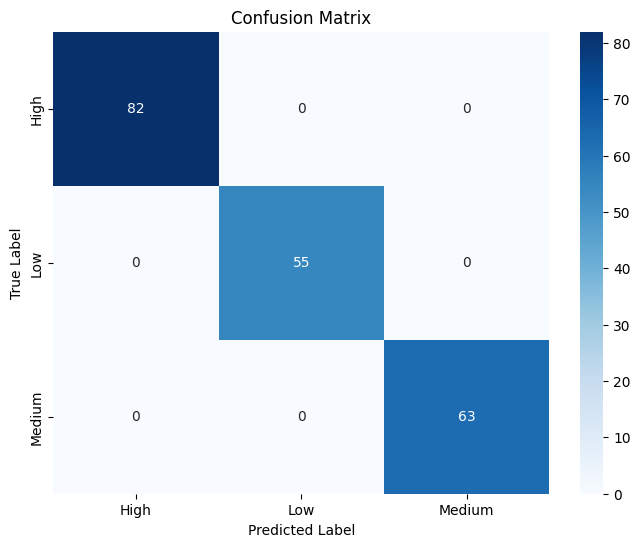

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

print("\n--- Detailed Classification Report ---")
# Using le.classes_ to get the original 'Low', 'Medium', 'High' labels for better readability
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, # Predicted labels
            yticklabels=le.classes_) # True labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 6. Predicting Cancer Risk Level


**6.1 Predicting Cancer Risk Level with Custom Data**

In [ ]:
import pandas as pd
import numpy as np

custom_data_raw = {
    'Age': 45,
    'Air_Pollution': 5,
    'Alcohol_use': 3,
    'Dust_Allergy': 4,
    'OccuPational_Hazards': 3,
    'Genetic_Risk': 2,
    'chronic_Lung_Disease': 1,
    'Balanced_Diet': 5,
    'Obesity': 2,
    'Smoking': 4,
    'Passive_Smoker': 2,
    'Chest_Pain': 3,
    'Coughing_of_Blood': 1,
    'Fatigue': 4,
    'Weight_Loss': 1,
    'Shortness_of_Breath': 2,
    'Wheezing': 3,
    'Swallowing_Difficulty': 1,
    'Clubbing_of_Finger_Nails': 2,
    'Frequent_Cold': 3,
    'Dry_Cough': 2,
    'Snoring': 1,
    'Gender': 1  # 1 for Male, 2 for Female
}

# Convert to a DataFrame
custom_df_raw = pd.DataFrame([custom_data_raw])

print("--- Original Custom Input ---")
print(custom_df_raw.to_markdown(index=False, numalign="left", stralign="left"))


# --- Applying the Same Preprocessing Steps ---

# 1. One-Hot Encode 'Gender'
custom_df_processed = pd.get_dummies(custom_df_raw, columns=['Gender'], drop_first=True)

for col in train_cols:
    if col not in custom_df_processed.columns:
        custom_df_processed[col] = 0
custom_df_processed = custom_df_processed[train_cols] # Ensure column order is correct

# 2. Feature Scale 'Age', 'Air_Pollution', and 'Smoking'
features_to_scale = ['Age', 'Air_Pollution', 'Smoking']

custom_df_processed[features_to_scale] = scaler.transform(custom_df_processed[features_to_scale])

print("\n--- Processed Custom Input (ready for model) ---")
print(custom_df_processed.to_markdown(index=False, numalign="left", stralign="left"))


# --- Make a Prediction with the Trained Model ---
# The model expects a 2D array, even for a single sample.
predicted_level_numeric = knn.predict(custom_df_processed)

# --- Convert the Numerical Prediction back to Original Label ---
predicted_level_text = le.inverse_transform(predicted_level_numeric)

print(f"\n--- Prediction for Custom Input ---")
print(f"The predicted cancer risk level is: {predicted_level_text[0]}")

--- Original Custom Input ---
| Age   | Air_Pollution   | Alcohol_use   | Dust_Allergy   | OccuPational_Hazards   | Genetic_Risk   | chronic_Lung_Disease   | Balanced_Diet   | Obesity   | Smoking   | Passive_Smoker   | Chest_Pain   | Coughing_of_Blood   | Fatigue   | Weight_Loss   | Shortness_of_Breath   | Wheezing   | Swallowing_Difficulty   | Clubbing_of_Finger_Nails   | Frequent_Cold   | Dry_Cough   | Snoring   | Gender   |
|:------|:----------------|:--------------|:---------------|:-----------------------|:---------------|:-----------------------|:----------------|:----------|:----------|:-----------------|:-------------|:--------------------|:----------|:--------------|:----------------------|:-----------|:------------------------|:---------------------------|:----------------|:------------|:----------|:---------|
| 45    | 5               | 3             | 4              | 3                      | 2              | 1                      | 5               | 2         | 4         

**6.2 Predicting Cancer Risk Level by Taking User Input**

In [ ]:
def get_user_input():

    print("Please enter the following details:")
    valid_ranges = {
        'Age': (14, 100),
        'Gender': (1, 2),
        'Air_Pollution': (1, 10),
        'Alcohol_use': (1, 10),
        'Dust_Allergy': (1, 10),
        'OccuPational_Hazards': (1, 10),
        'Genetic_Risk': (1, 10),
        'chronic_Lung_Disease': (1, 10),
        'Balanced_Diet': (1, 10),
        'Obesity': (1, 10),
        'Smoking': (1, 10),
        'Passive_Smoker': (1, 10),
        'Chest_Pain': (1, 10),
        'Coughing_of_Blood': (1, 10),
        'Fatigue': (1, 10),
        'Weight_Loss': (1, 10),
        'Shortness_of_Breath': (1, 10),
        'Wheezing': (1, 10),
        'Swallowing_Difficulty': (1, 10),
        'Clubbing_of_Finger_Nails': (1, 10),
        'Frequent_Cold': (1, 10),
        'Dry_Cough': (1, 10),
        'Snoring': (1, 10)
    }
    custom_data = {}
    for key, (min_value, max_value) in valid_ranges.items():
        while True:
            try:
                if key == 'Gender':
                    value = int(input(f"{key} (1 for Male, 2 for Female): "))
                else:
                    value = int(input(f"{key} ({min_value}-{max_value}): "))
                if min_value <= value <= max_value:
                    custom_data[key] = value
                    break
                else:
                    print("Please enter a value within the valid range.")
            except ValueError:
                print("Invalid input. Please enter a number.")
    return custom_data

def predict_cancer_risk(custom_data):

    custom_df = pd.DataFrame([custom_data])
    custom_df = pd.get_dummies(custom_df, columns=['Gender'], drop_first=True)
    for col in X_train.columns:
        if col not in custom_df.columns:
            custom_df[col] = 0
    custom_df = custom_df[X_train.columns]
    features_to_scale = ['Age', 'Air_Pollution', 'Smoking']
    custom_df[features_to_scale] = scaler.transform(custom_df[features_to_scale])
    custom_pred = knn.predict(custom_df)
    custom_pred_label = le.inverse_transform(custom_pred)
    return custom_pred_label[0]

def main():
    custom_data = get_user_input()
    predicted_cancer_risk = predict_cancer_risk(custom_data)
    print(f"\nPredicted cancer risk level: {predicted_cancer_risk}")

if __name__ == "__main__":
    main()

Please enter the following details:
Age (14-100): 26
Gender (1 for Male, 2 for Female): 1
Air_Pollution (1-10): 6
Alcohol_use (1-10): 5
Dust_Allergy (1-10): 3
OccuPational_Hazards (1-10): 5
Genetic_Risk (1-10): 1
chronic_Lung_Disease (1-10): 1
Balanced_Diet (1-10): 7
Obesity (1-10): 7
Smoking (1-10): 6
Passive_Smoker (1-10): 2
Chest_Pain (1-10): 1
Coughing_of_Blood (1-10): 1
Fatigue (1-10): 5
Weight_Loss (1-10): 2
Shortness_of_Breath (1-10): 2
Wheezing (1-10): 3
Swallowing_Difficulty (1-10): 1
Clubbing_of_Finger_Nails (1-10): 1
Frequent_Cold (1-10): 6
Dry_Cough (1-10): 3
Snoring (1-10): 3

Predicted cancer risk level: Low


# 7. Conclusion

This project successfully developed a machine learning model to predict lung cancer risk levels (Low, Medium, High) using a dataset of patient attributes. We performed essential data preprocessing, including feature scaling and handling categorical variables, and trained a **K-Nearest Neighbors (KNN)** classifier. The model demonstrates high accuracy in classifying individuals into different risk categories. It also demonstrates the potential to offer a preliminary risk assessment, which could be valuable for early awareness and encouraging further medical consultation.

# 8. Future Work

To enhance this prediction system, future efforts could focus on:

* **Model Improvement:** Experimenting with alternative machine learning algorithms (e.g., Random Forest, Gradient Boosting) and fine-tuning the current model's hyperparameters to improve predictive accuracy.

* **Data Expansion & Balance:** Seeking a larger and more diverse dataset, and addressing any class imbalance to build a more robust and generalized model.

* **Interpretability:** Incorporating Explainable AI (XAI) techniques to understand the model's decision-making process, increasing trust and utility for medical professionals.

* **Deployment:** Exploring the creation of a user-friendly web interface for easier access and practical application of the prediction tool.